In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files
import os

In [3]:
# Load class names from coco.names file
classNames = []
classFile = '/content/coco.names'
with open(classFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

# Load the pre-trained model
configPath = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = '/content/frozen_inference_graph.pb'

net = cv2.dnn_DetectionModel(weightsPath, configPath)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

< cv2.dnn.Model 0x7a1f2c103d50>

In [4]:
def detect_objects_in_image(image_path):
    # Read the image from the file path
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to open image")
        return

    # Resize the image to match the expected input size
    img = cv2.resize(img, (700, 500))

    # Detect objects in the image
    classIds, confs, bbox = net.detect(img, confThreshold=0.5)

    if len(classIds) != 0:
        for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
            # Ensure classId is within the valid range
            if 0 <= classId < len(classNames):
                cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
                cv2.putText(img, classNames[classId - 1].upper(), (box[0] + 10, box[1] + 30),
                            cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
                cv2.putText(img, str(round(confidence * 100, 2)), (box[0] + 200, box[1] + 30),
                            cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
            else:
                print(f"Invalid classId: {classId}")

    # Display the image with detected objects
    cv2_imshow(img)

Saving istockphoto-1306225407-612x612.jpg to istockphoto-1306225407-612x612.jpg


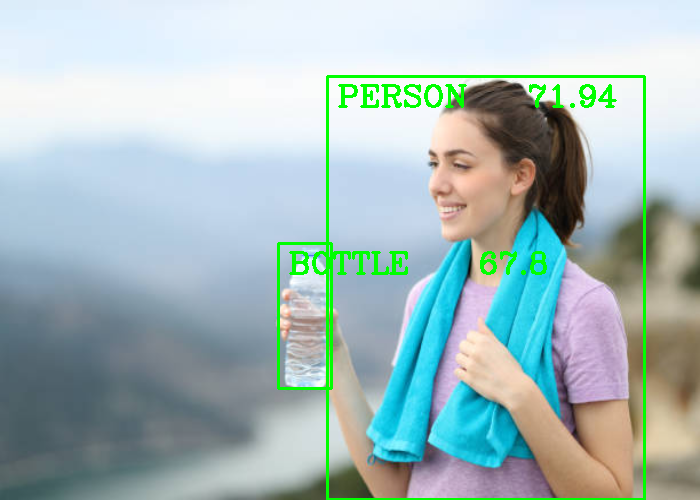

In [5]:
# Upload an image file
uploaded_image = files.upload()

# Save the uploaded image
for filename in uploaded_image.keys():
    image_path = filename

# Perform object detection on the uploaded image
detect_objects_in_image(image_path)